# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df = pd.merge(study_results, mouse_metadata, on='Mouse ID', how = "left")

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mouse_count = len(data_df["Mouse ID"].unique())
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = data_df.loc[data_df.duplicated(subset = ["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicates

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = data_df[data_df['Mouse ID'].isin(duplicates)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df["Mouse ID"].nunique()

clean_mice

248

## Summary Statistics

In [8]:
mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
summary_df = clean_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [10]:
mean_mouse = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
mean_mouse
median_mouse = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
median_mouse

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
var = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
sem = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})
# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [14]:
mice_count = clean_df["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0.5, 1.0, 'Drug Regimen Count of Rows')

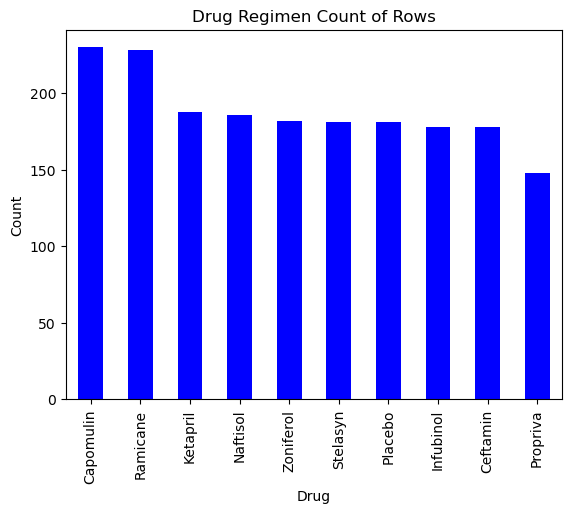

In [15]:
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug")
plt.ylabel("Count")
plt.title("Drug Regimen Count of Rows")

Text(0.5, 1.0, 'Number of Mice per Treatment')

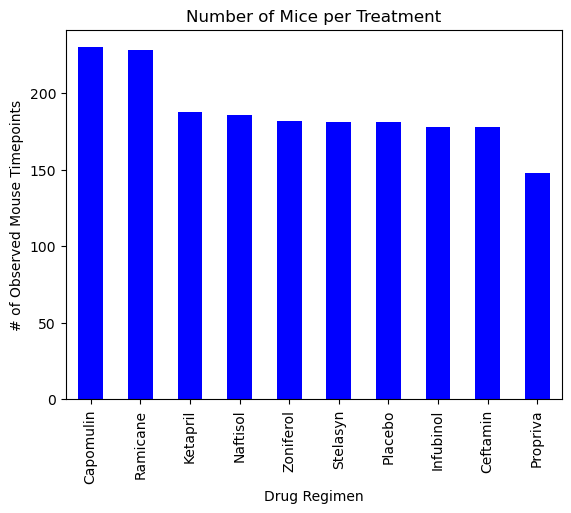

In [16]:
plot_pandas = mice_count.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mice per Treatment")

Text(0.5, 1.0, 'Drug Regimen Count of Rows')

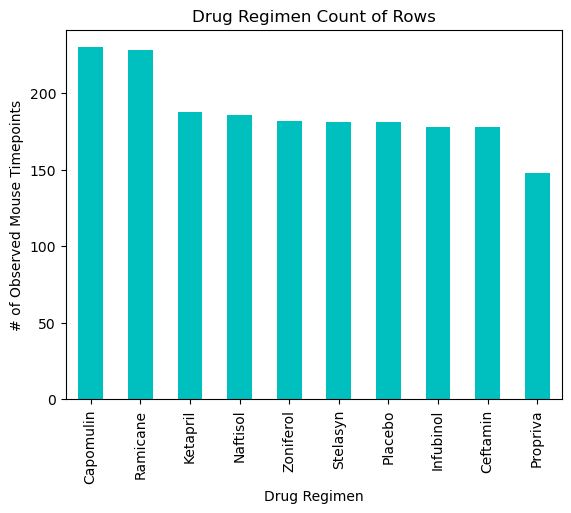

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plot_pandas = mice_count.plot.bar(color='c')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen Count of Rows")

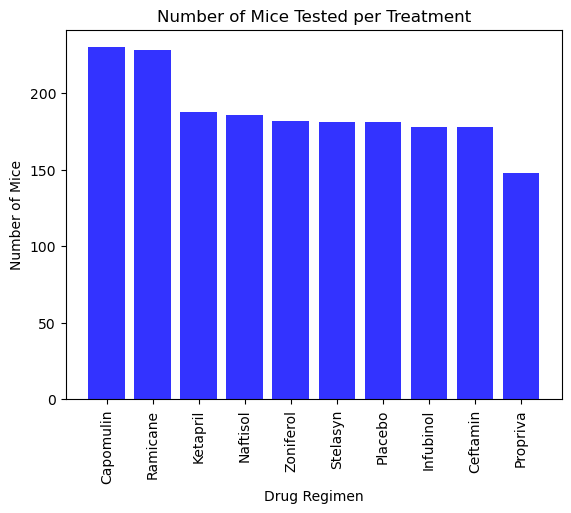

In [18]:
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.title("Number of Mice Tested per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")

plt.show()

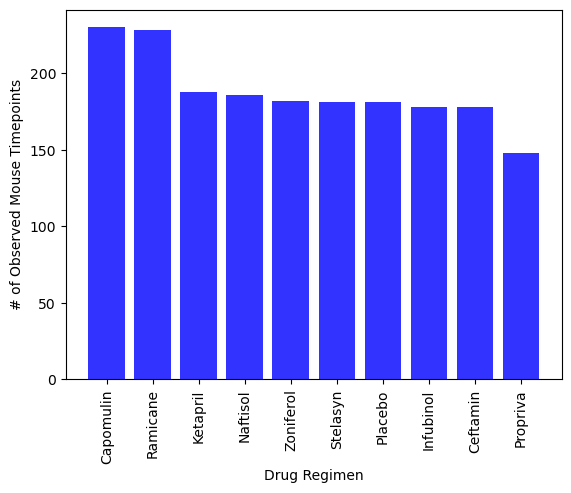

In [19]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

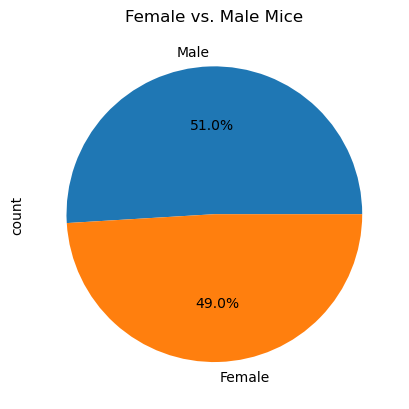

In [20]:
gender_data = clean_df["Sex"].value_counts()
plt.title("Female vs. Male Mice")
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

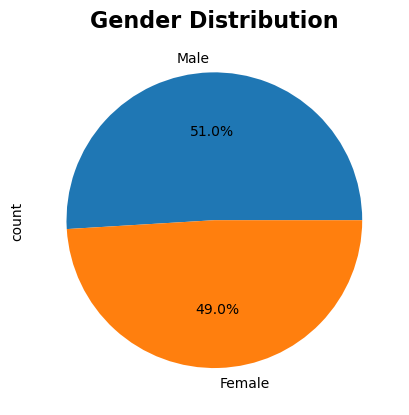

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data = clean_df["Sex"].value_counts()
plt.title("Gender Distribution", fontweight = "bold", fontsize = 16)
gender_data.plot.pie(autopct= "%1.1f%%")
plt.show()

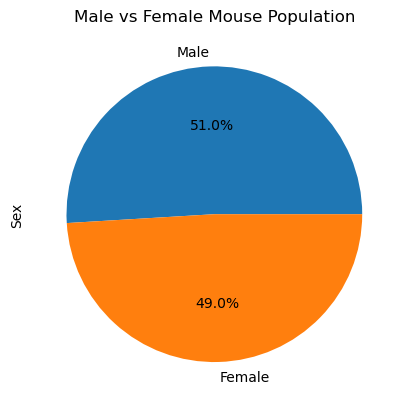

In [22]:
labels = ['Female', 'Male']
sizes = [50, 50]
plot = gender_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
plt.show()

In [23]:
gender_data

Sex
Male      958
Female    922
Name: count, dtype: int64

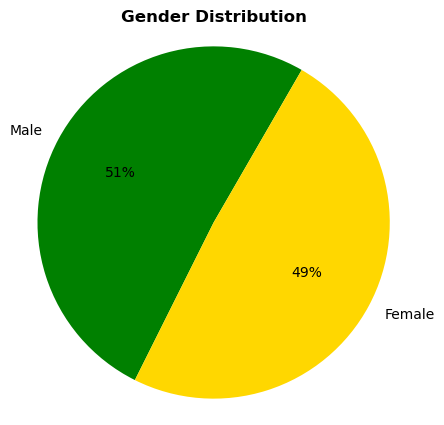

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pies = gender_data.index
pie_votes = gender_data

colors = ["green", "gold"]

plt.figure(figsize = (5,5))
plt.pie(pie_votes, labels = pies, colors = colors, autopct = "%1.0f%%", startangle = 60)

plt.title("Gender Distribution", fontweight = "bold", fontsize = 12)

plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
ram_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
inf_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
cef_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

In [26]:
cap_last = cap_df.groupby('Mouse ID').max()['Timepoint']
cap_vol = pd.DataFrame(cap_last)
cap_merge = pd.merge(cap_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
cap_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22


In [27]:
cap_merge['Mouse ID'].value_counts()

Mouse ID
b128    1
r157    1
x401    1
w914    1
w150    1
v923    1
u364    1
t565    1
s710    1
s185    1
r944    1
r554    1
m957    1
b742    1
m601    1
l897    1
l509    1
j246    1
j119    1
i738    1
i557    1
g316    1
g288    1
f966    1
y793    1
Name: count, dtype: int64

In [28]:
Capomulin_tumors = cap_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [29]:
Ramicane_last = ram_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin", :]

Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()
# Start by getting the last (greatest) timepoint for each mouse
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()
Ramicane_merge.to_csv("output.csv")
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles =Ramicane_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors is: {lowerq}")
print(f"The upper quartile of Ramicane tumors is: {upperq}")
print(f"The interquartile range of Ramicane tumors is: {iqr}")
print(f"The median of Ramicane tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
The lower quartile of Ramicane tumors is: 31.56046955
The upper quartile of Ramicane tumors is: 40.65900627
The interquartile range of Ramicane tumors is: 9.098536719999998
The median of Ramicane tumors is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [31]:
Clean_last = clean_df.groupby('Mouse ID').max()['Timepoint']
Clean_vol = pd.DataFrame(Clean_last)
Clean_merge = pd.merge(Clean_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
Clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            248 non-null    object 
 1   Timepoint           248 non-null    int64  
 2   Tumor Volume (mm3)  248 non-null    float64
 3   Metastatic Sites    248 non-null    int64  
 4   Drug Regimen        248 non-null    object 
 5   Sex                 248 non-null    object 
 6   Age_months          248 non-null    int64  
 7   Weight (g)          248 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.6+ KB


In [32]:
Clean_merge

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [33]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_lists = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    sub = Clean_merge.loc[Clean_merge["Drug Regimen"] == drug]
    
    # add subset 
    tumor = sub["Tumor Volume (mm3)"]
    tumor_lists.append(tumor)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumor.loc[(tumor < lower_bound) | (tumor > upper_bound)]
    print (drug)
    print (outliers)
    print (lowerq)  
    print (upperq)
    print (iqr)

Capomulin
Series([], Name: Tumor Volume (mm3), dtype: float64)
32.37735684
40.1592203
7.781863460000004
Ramicane
Series([], Name: Tumor Volume (mm3), dtype: float64)
31.56046955
40.65900627
9.098536719999998
Infubinol
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
54.04860769
65.52574285
11.477135160000003
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)
48.72207785
64.29983003
15.577752179999997


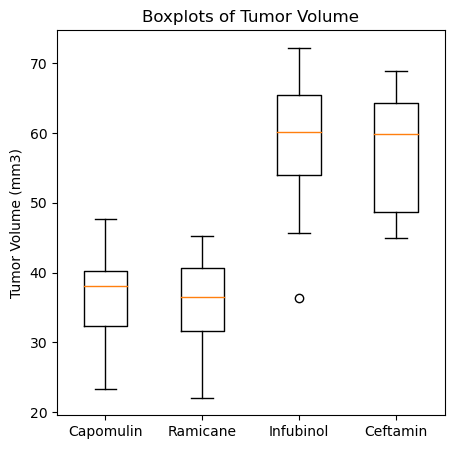

In [34]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.figure(figsize = (5, 5))
plt.boxplot(tumor_lists, labels = drugs)
plt.ylabel("Tumor Volume (mm3)")
plt.title("Boxplots of Tumor Volume")
plt.show()

In [35]:
import seaborn as sns

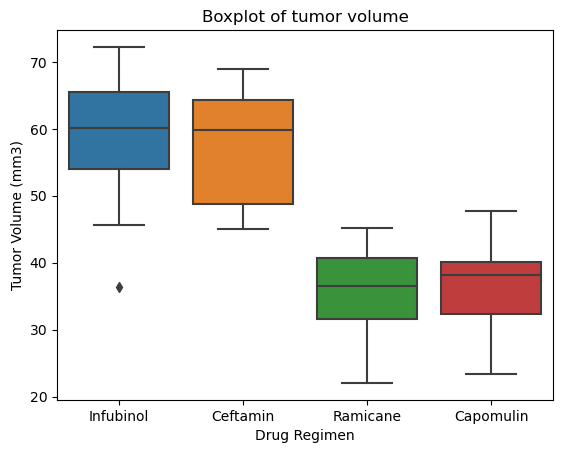

In [36]:
df4 = Clean_merge.loc[Clean_merge["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
sns.boxplot(df4, x = "Drug Regimen", y = "Tumor Volume (mm3)")
plt.title("Boxplot of tumor volume")
plt.show()

## Line and Scatter Plots

In [44]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 245
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            100 non-null    object 
 1   Timepoint           100 non-null    int64  
 2   Tumor Volume (mm3)  100 non-null    float64
 3   Metastatic Sites    100 non-null    int64  
 4   Drug Regimen        100 non-null    object 
 5   Sex                 100 non-null    object 
 6   Age_months          100 non-null    int64  
 7   Weight (g)          100 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 7.0+ KB


In [45]:
df4

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [37]:
df4.loc[df4["Drug Regimen"] == "Capomulin"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
19,b128,45,38.982878,2,Capomulin,Female,9,22
24,b742,45,38.939633,0,Capomulin,Male,7,21
61,f966,20,30.485985,0,Capomulin,Male,16,17
64,g288,45,37.074024,1,Capomulin,Male,3,19
66,g316,45,40.159220,2,Capomulin,Female,22,22
80,i557,45,47.685963,1,Capomulin,Female,1,24
83,i738,45,37.311846,2,Capomulin,Female,23,20
85,j119,45,38.125164,1,Capomulin,Female,7,23
87,j246,35,38.753265,1,Capomulin,Female,21,21
108,l509,45,41.483008,3,Capomulin,Male,17,21


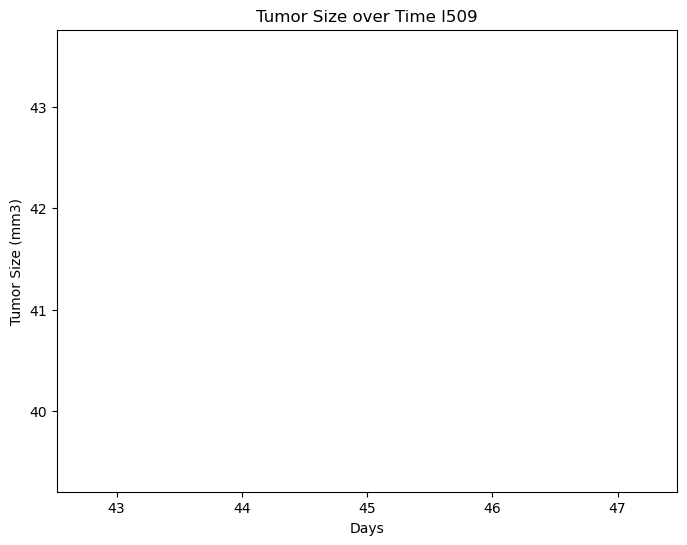

In [42]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#df4.loc[df4["Drug Regimen"] == "Capomulin"]
mouse = "l509"

sub_mouse = df4.loc[df4["Mouse ID"] == mouse]

plt.figure(figsize=(8,6))
plt.plot(sub_mouse.Timepoint, sub_mouse["Tumor Volume (mm3)"])
plt.xlabel("Days")
plt.ylabel("Tumor Size (mm3)")
plt.title(f"Tumor Size over Time l509")
plt. show()

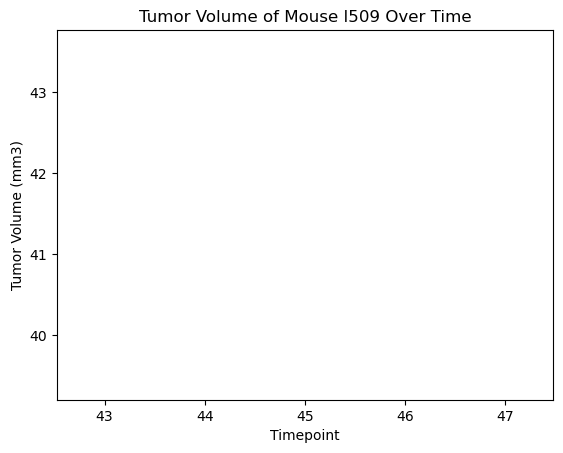

In [46]:
line_plot = df4.loc[(df4["Mouse ID"] == "l509")]
line_plot = line_plot.set_index("Timepoint")
line_plot

#Final plot
line_plot["Tumor Volume (mm3)"].plot(color = "darkorange")
plt.title("Tumor Volume of Mouse l509 Over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
CAP_df = df4.loc[df4["Drug Regimen"] == "Capomulin"]

data = CAP_df.groupby("Mouse ID", as_index=False).agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
data.corr()

ValueError: could not convert string to float: 'b128'

## Correlation and Regression

In [ ]:
from scipy.stats import linregress

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x-values = 